![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Advanced Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics

# MCC implementation tests

In [51]:
#HIDDEN
import numpy as np
import matplotlib.pyplot as plt #plotting
import seaborn as sns
import os
import mtest
import tfel.math

In [52]:
import plot_settings
%run stress_path_defs.ipynb

In [53]:
%run plot_settings.py

In [54]:
#HIDDEN
build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInitNLnu_abs.mfront'
#os.system(build_release)

In [55]:
#HIDDEN
build_release = 'mfront --obuild --interface=generic ModCamClayStandard.mfront'
#os.system(build_release)

In [56]:
build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInitNLnu_inc.mfront'
#os.system(build_release)

In [57]:
nu = 0.25  # Poisson ratio
E = 50.0e6  # Young's modulus in Pa
la = 7.7e-2  # slope of the virgin consolidation line
ka = 6.6e-3  # slope of the swelling line
M = 1.2  # slope of the critical state line (CSL)
v0 = 1.788  # initial volume ratio
phi0 = 1 - 1 / v0  # Initial porosity
pc0 = 800.0e3  # Initial pre-consolidation pressure in Pa
pamb = 1.0  # Ambient pressure in Pa

times = np.linspace(0,1,1000)

In [58]:
#HIDDEN
#%run stress_path_defs.ipynb
#sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)
orig_OCR8 = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [59]:
orig_OCR2 = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

In [60]:
#%run stress_path_defs.ipynb
#build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInit.mfront'
#os.system(build_release)
OGS_OCR8 = MCC_triax_test_OGS(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [61]:
OGS_OCR2 = MCC_triax_test_OGS(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

In [62]:
OGS_NL_OCR8 = MCC_triax_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [63]:
OGS_NL_OCR2 = MCC_triax_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

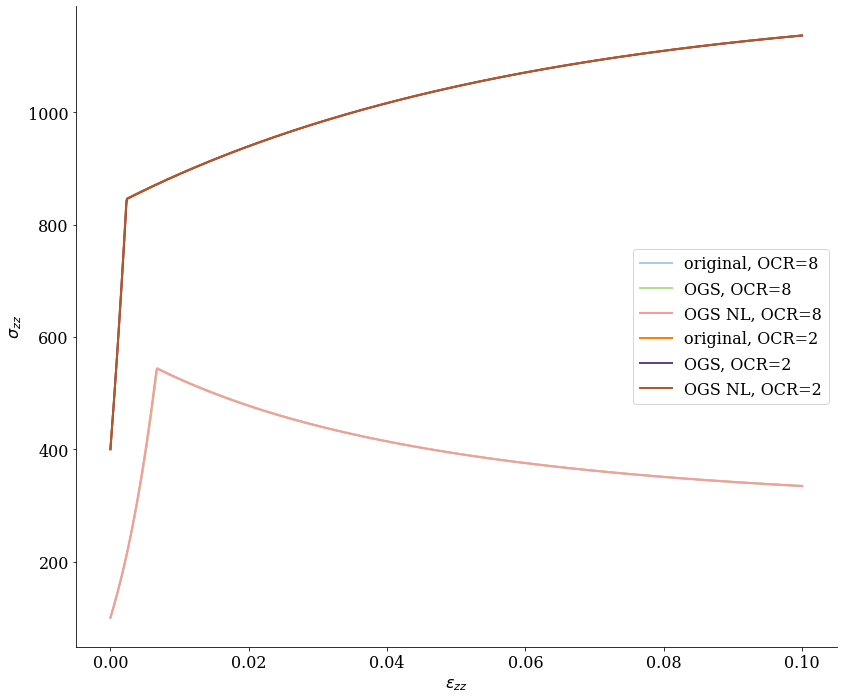

In [64]:
import matplotlib.cm as cm
# Get the paired colormap
cmap = cm.get_cmap('Paired')

# Get the list of colors from the colormap
colors = cmap(np.linspace(0, 1, 6))

fig, ax = plt.subplots(figsize=(12,10))

# Set the color of each line using the colors from the colormap
ax.plot(orig_OCR8[5], orig_OCR8[4]/1e3, label='original, OCR=8', color=colors[0])
ax.plot(OGS_OCR8[5], OGS_OCR8[4]/1e3, label='OGS, OCR=8', color=colors[1])
ax.plot(OGS_NL_OCR8[5], OGS_NL_OCR8[4]/1e3, label='OGS NL, OCR=8', color=colors[2])
ax.plot(orig_OCR2[5], orig_OCR2[4]/1e3, label='original, OCR=2', color=colors[3])
ax.plot(OGS_OCR2[5], OGS_OCR2[4]/1e3, label='OGS, OCR=2', color=colors[4])
ax.plot(OGS_NL_OCR2[5], OGS_NL_OCR2[4]/1e3, label='OGS NL, OCR=2', color=colors[5])
ax.legend()
ax.set_xlabel('$\\epsilon_{zz}$')
ax.set_ylabel('$\\sigma_{zz}$')
fig.tight_layout();

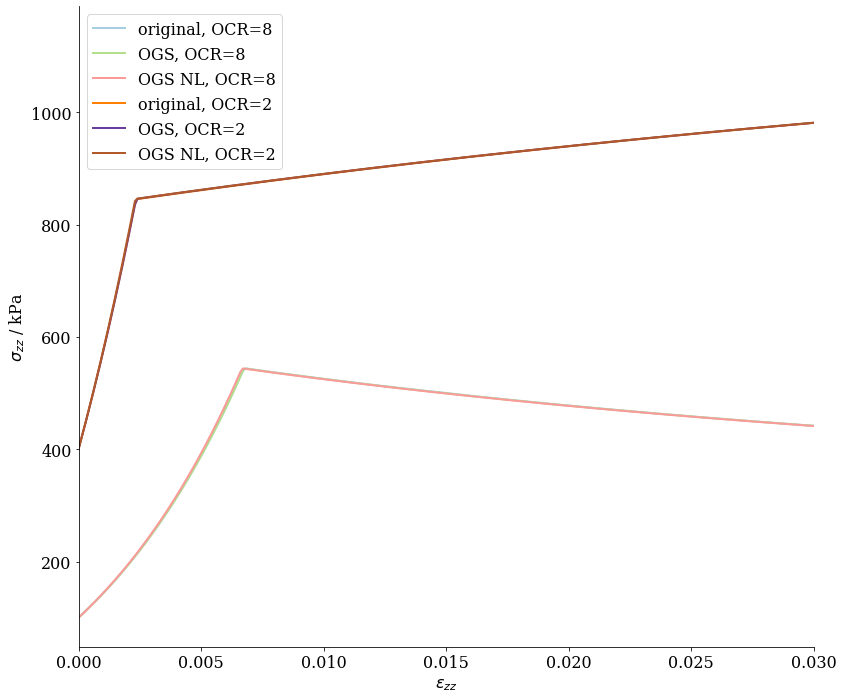

In [65]:
fig, ax = plt.subplots(figsize=(12,10))

# Set the color of each line using the colors from the colormap
ax.plot(orig_OCR8[5], orig_OCR8[4]/1e3, label='original, OCR=8', color=colors[0])
ax.plot(OGS_OCR8[5], OGS_OCR8[4]/1e3, label='OGS, OCR=8', color=colors[1])
ax.plot(OGS_NL_OCR8[5], OGS_NL_OCR8[4]/1e3, label='OGS NL, OCR=8', color=colors[2])
ax.plot(orig_OCR2[5], orig_OCR2[4]/1e3, label='original, OCR=2', color=colors[3])
ax.plot(OGS_OCR2[5], OGS_OCR2[4]/1e3, label='OGS, OCR=2', color=colors[4])
ax.plot(OGS_NL_OCR2[5], OGS_NL_OCR2[4]/1e3, label='OGS NL, OCR=2', color=colors[5])
ax.legend()
ax.set_xlabel('$\\epsilon_{zz}$')
ax.set_ylabel('$\\sigma_{zz}$ / kPa')
ax.set_xlim(0,0.03)
fig.tight_layout();

We do see differences in the elastic part of the stress-strain curve. Yield stress and plastic flow are captured well by all models. Let's look at the volumetric behaviour:

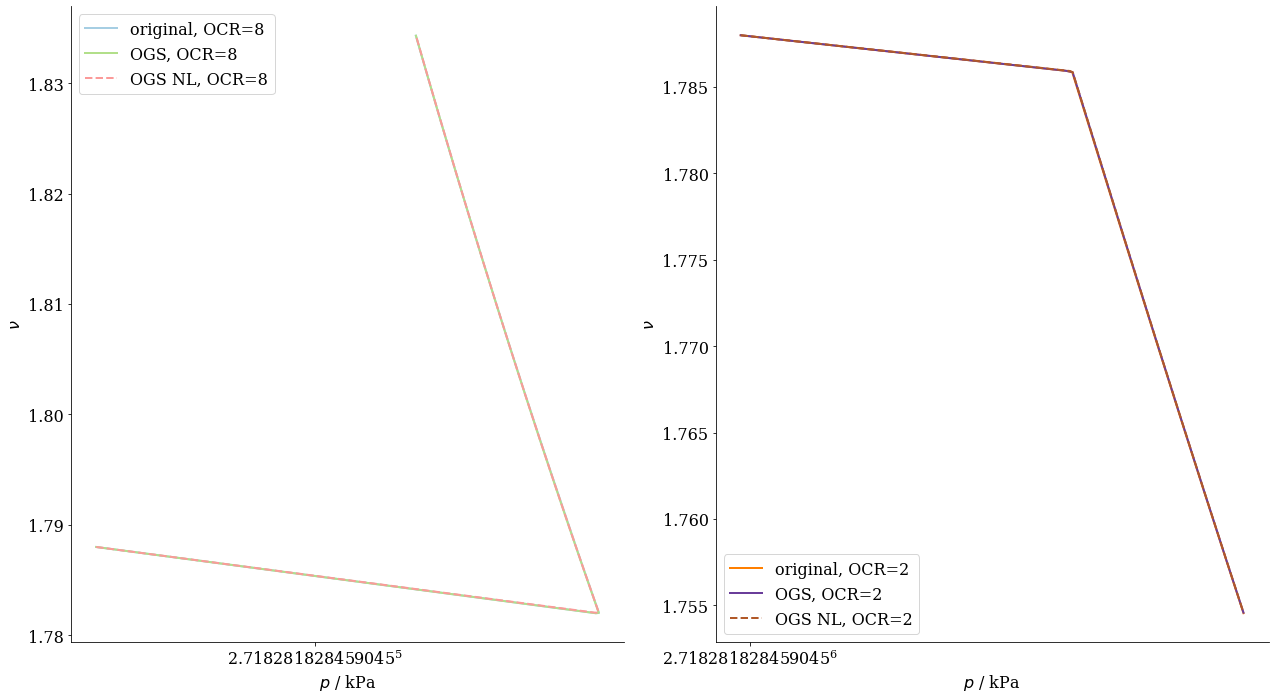

In [66]:
fig, ax = plt.subplots(figsize=(18,10),ncols=2)

# Set the color of each line using the colors from the colormap

ax[0].plot((orig_OCR8[0]+orig_OCR8[2]+orig_OCR8[4])/3e3, orig_OCR8[13], label='original, OCR=8', color=colors[0])
ax[0].plot((OGS_OCR8[0]+OGS_OCR8[2]+OGS_OCR8[4])/3e3, OGS_OCR8[13], label='OGS, OCR=8', color=colors[1])
ax[0].plot((OGS_NL_OCR8[0]+OGS_NL_OCR8[2]+OGS_NL_OCR8[4])/3e3, OGS_NL_OCR8[13], label='OGS NL, OCR=8', color=colors[2],ls='--')

ax[1].plot((orig_OCR2[0]+orig_OCR2[2]+orig_OCR2[4])/3e3, orig_OCR2[13], label='original, OCR=2', color=colors[3])
ax[1].plot((OGS_OCR2[0]+OGS_OCR2[2]+OGS_OCR2[4])/3e3, OGS_OCR2[13], label='OGS, OCR=2', color=colors[4])
ax[1].plot((OGS_NL_OCR2[0]+OGS_NL_OCR2[2]+OGS_NL_OCR2[4])/3e3, OGS_NL_OCR2[13], label='OGS NL, OCR=2', color=colors[5],ls='--')
for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel('$p$ / kPa')
    ax[i].set_ylabel('$\\nu$')
    ax[i].set_xscale('log',base=np.e)
fig.tight_layout();

All non-linear models produce the desired $\lambda$, $\kappa$ behaviour. OGS NL and the classic model behave identically. So I think the above difference stems from the treatment of shear (in OGS NL it is absolute, instead of incremental, which could explain the stiffening). To compare with the analytical result, let's perform an **isotropic compression test**.

In [67]:
OGS_NL_iso = MCC_iso_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,pc0/4,2*pc0,times)
%run stress_path_defs.ipynb
orig_iso = MCC_iso_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,pc0/4,2*pc0,times)

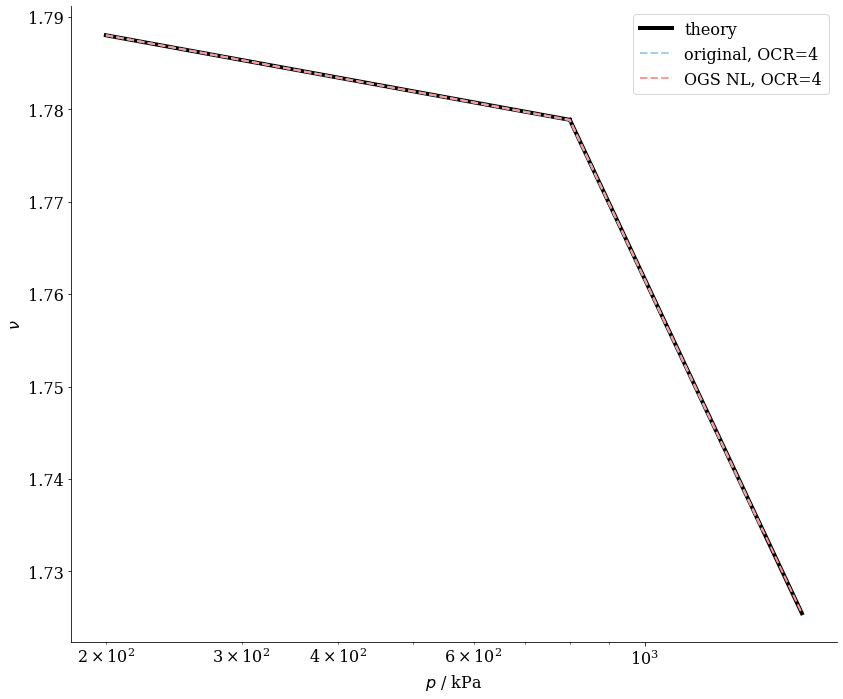

In [68]:
fig, ax = plt.subplots(figsize=(12,10))

ax.plot([pc0/1e3,2*pc0/1e3],
           [1/(1-phi0)-ka*np.log(pc0/(pc0/4)),1/(1-phi0)-ka*np.log(pc0/(pc0/4))-la*np.log(2*pc0/pc0)],
           color='black',lw=4,label='theory')
ax.plot([pc0/4e3,pc0/1e3],
           [1/(1-phi0),1/(1-phi0)-ka*np.log(pc0/(pc0/4))],
           color='black',lw=4)
ax.plot((orig_iso[0]+orig_iso[2]+orig_iso[4])/3e3, orig_iso[13], label='original, OCR=4', color=colors[0],ls='--')
ax.plot((OGS_NL_iso[0]+OGS_NL_iso[2]+OGS_NL_iso[4])/3e3, OGS_NL_iso[13], label='OGS NL, OCR=4', color=colors[2],ls='--')
ax.legend()
ax.set_xlabel('$p$ / kPa')
ax.set_ylabel('$\\nu$')
ax.set_xscale('log')#,base=np.e)
fig.tight_layout();

Here we see that the original formulation coincides better with the expected result during hardening. However, the original code did not converge in stress-control, whereas the OGS NL code did. For the original code, I had to switch to a strain-controlled test.

## Suggested steps

* simplified treatment of elastic constant update and stress computation as in original MCC implementation -- shortens the code, no special functions
* algorithmic structure (additional convergence steps, non-dimensional residual formulation, analytical Jacobian, tight tolerances) from OGS (NL) implementation
* demonstrate convergence and repeat the above steps with coarse time resolution
* reduced output set of internal variables compared to current OGS versions (less redundancy -- only one volumetric measure)
* integration into source code as combined author list (ES, CS, MM, TH, TN)